<a href="https://colab.research.google.com/github/taiynlee/Kubernetes-CN/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 上面的runtime 點change runtime type 選gpu
from tensorflow.keras.datasets.cifar10 import load_data

In [2]:
(x_train,y_train),(x_test,y_test)=load_data()
print(x_train.shape)
print(x_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


ship


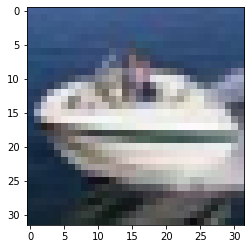

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
trans=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
idx=222
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense,Flatten,Dropout

layers=[
        Conv2D(64,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,3)),
        MaxPool2D(),
        Conv2D(128,kernel_size=3,padding="same",activation="relu"),
        MaxPool2D(),
        Conv2D(256,kernel_size=3,padding="same",activation="relu"),
        MaxPool2D(),
        Conv2D(512,kernel_size=3,padding="same",activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(256,activation="relu"),
        Dropout(0.25),
        Dense(10,activation="softmax")
]
model=Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 512)        

In [11]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])
x_train_norm=x_train/255
x_test_norm=x_test/255

In [12]:
model.fit(x_train_norm,y_train,validation_split=0.1,batch_size=200,epochs=1,verbose=2)
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
c=[ModelCheckpoint("mlp.h5",save_best_only=True),
   EarlyStopping(patience=3,restore_best_weights=True)]
model.fit(x_train_norm,y_train,validation_split=0.1,batch_size=200,epochs=50,verbose=2,callbacks=c)


225/225 - 5s - loss: 1.6353 - accuracy: 0.3942 - val_loss: 1.2370 - val_accuracy: 0.5530
Epoch 1/50
225/225 - 5s - loss: 1.1609 - accuracy: 0.5846 - val_loss: 0.9886 - val_accuracy: 0.6500
Epoch 2/50
225/225 - 5s - loss: 0.9304 - accuracy: 0.6733 - val_loss: 0.8293 - val_accuracy: 0.7130
Epoch 3/50
225/225 - 5s - loss: 0.7693 - accuracy: 0.7316 - val_loss: 0.7622 - val_accuracy: 0.7308
Epoch 4/50
225/225 - 5s - loss: 0.6477 - accuracy: 0.7746 - val_loss: 0.7102 - val_accuracy: 0.7520
Epoch 5/50
225/225 - 5s - loss: 0.5404 - accuracy: 0.8137 - val_loss: 0.7074 - val_accuracy: 0.7598
Epoch 6/50
225/225 - 5s - loss: 0.4297 - accuracy: 0.8514 - val_loss: 0.7116 - val_accuracy: 0.7642
Epoch 7/50
225/225 - 5s - loss: 0.3336 - accuracy: 0.8858 - val_loss: 0.6890 - val_accuracy: 0.7768
Epoch 8/50
225/225 - 5s - loss: 0.2500 - accuracy: 0.9141 - val_loss: 0.8199 - val_accuracy: 0.7604
Epoch 9/50
225/225 - 5s - loss: 0.1860 - accuracy: 0.9357 - val_loss: 0.8029 - val_accuracy: 0.7746
Epoch 10/50

In [14]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7231 - accuracy: 0.7697


[0.7230614423751831, 0.7696999907493591]

In [15]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 1, 7])

In [16]:
print(y_test.shape)
print(pre.shape)
y_test_reshape=y_test.reshape(-1)
print(y_test_reshape.shape)

(10000, 1)
(10000,)
(10000,)


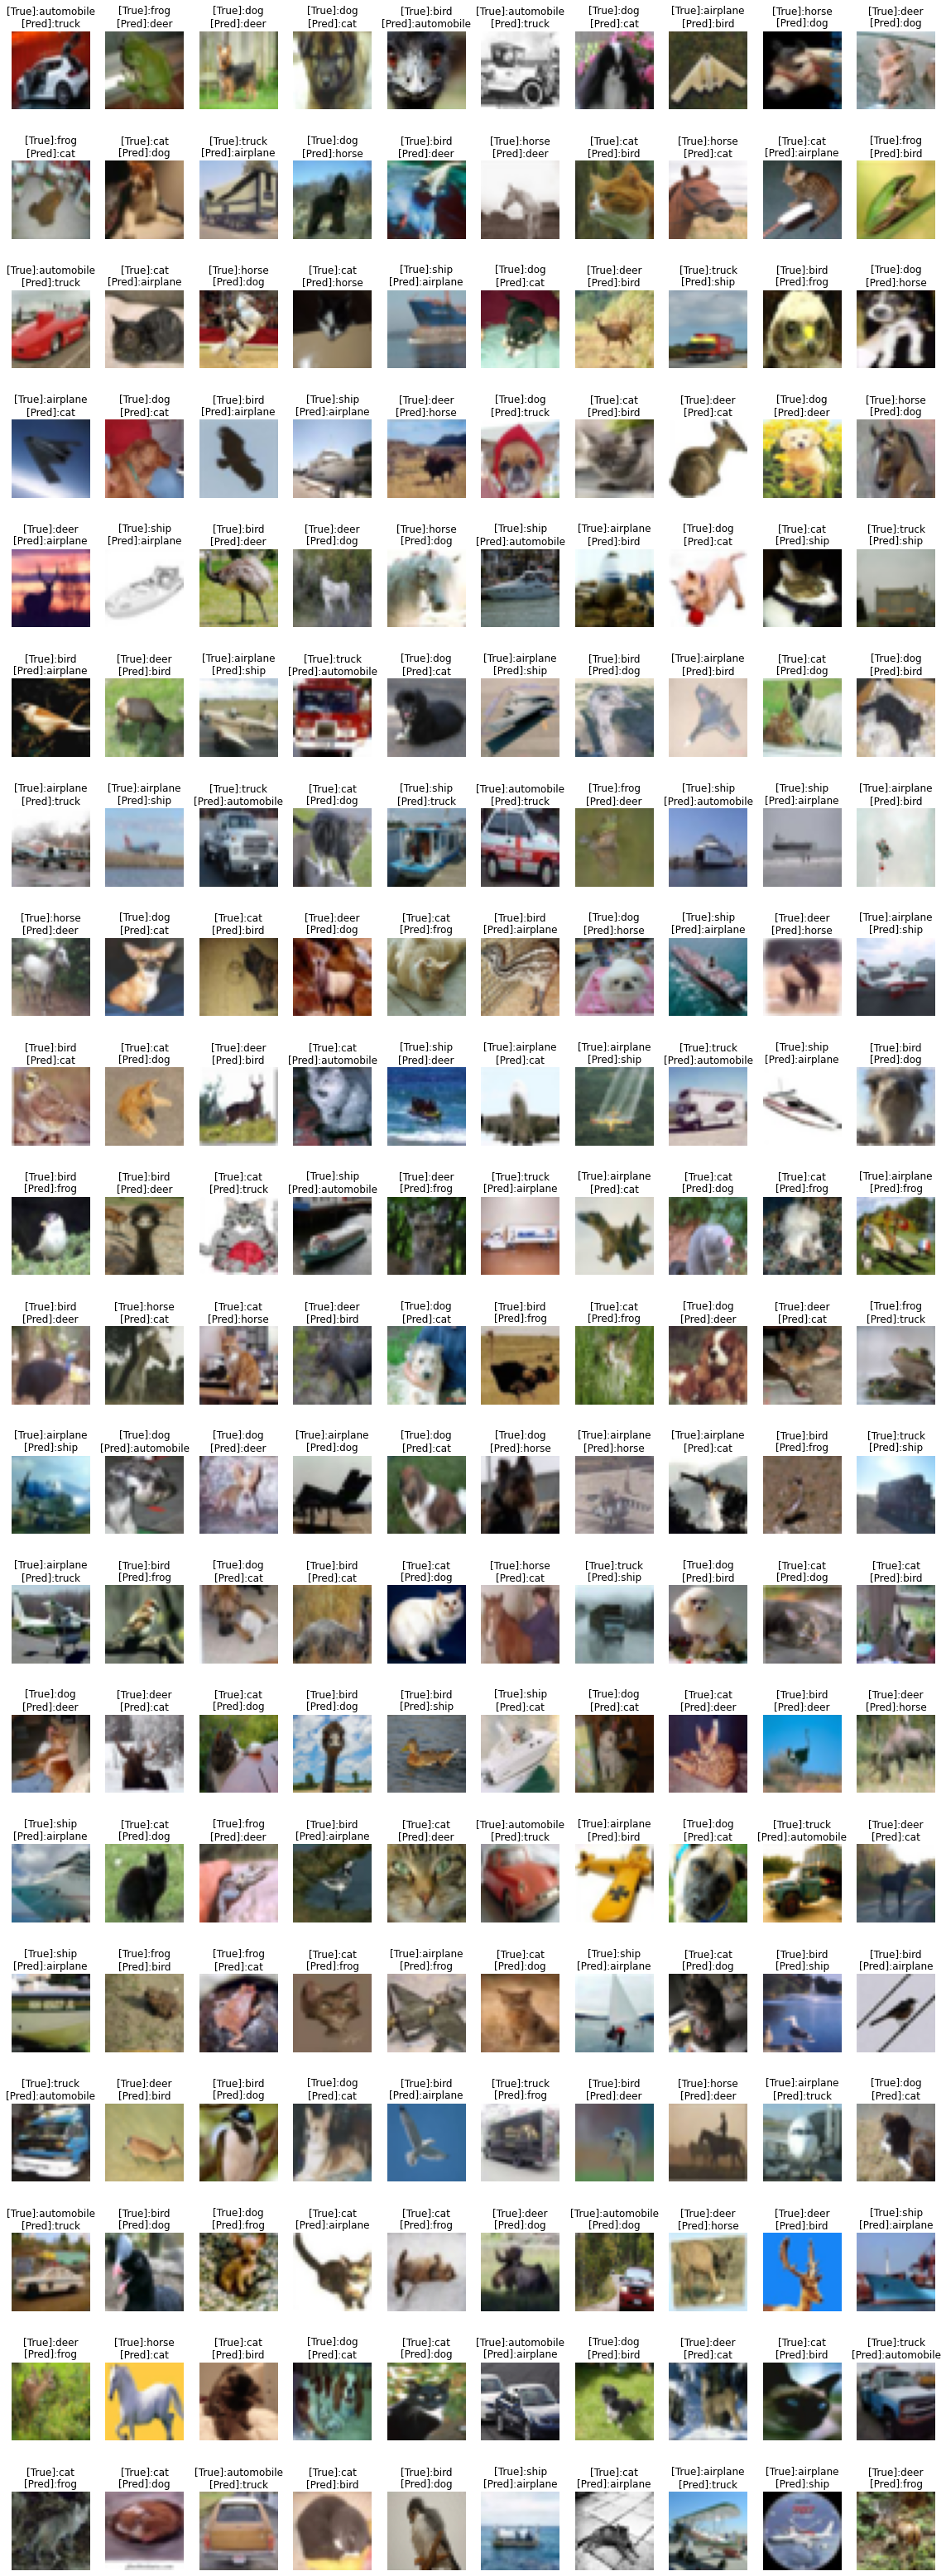

In [17]:
import numpy as np
idx=np.nonzero(pre!=y_test_reshape)[0]
idx=idx[:200]
false_label=y_test_reshape[idx]
false_pred=pre[idx]
false_img=x_test[idx]

plt.figure(figsize=(20,60))
width=10
height=len(idx)//width+1

for i,img in enumerate(false_img):
  plt.subplot(height,width,i+1)
  t="[True]:{}\n[Pred]:{}".format(trans[false_label[i]],trans[false_pred[i]])
  plt.title(t)
  plt.axis("off")
  plt.imshow(img)